### Libraries used in this project

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## 1- Dataset analysis and report on important statistics

   sample    x1  x2         x3   x4       x5       x6     x7       x8      x9  \
0       1  1353 NaN   1.142857   88  104.850  0.00727  0.443    7.997   6.990   
1       2  1107 NaN   4.857143  306  194.175  0.03778  0.363   34.002  12.945   
2       3   984 NaN   6.571429  368  208.575  0.05750  0.356   46.000  13.905   
3       4  1107 NaN   4.714286  297  175.725  0.03667  0.354   33.003  11.715   
4       5   123 NaN  33.571429  235  225.000  2.35000  0.923  235.000  15.000   

       x10   x11       x12   x13 x14     y  
0  8346.00   3.9  0.032695  0.05  C1   Low  
1   376.64  11.1  0.210526  3.15  C3   Low  
2   451.54  13.1  0.271930  3.10  C1   Low  
3   393.76  10.5  0.185008  2.85  C1   Low  
4  5805.82  21.7  0.187400  0.40  C4  High   

Description of numerical training data:
            sample            x1          x2           x3             x4  \
count  1000.000000   1000.000000  102.000000  1000.000000    1000.000000   
mean    500.500000   1867.632000    0.501471    1

C:\Users\hayde\AppData\Local\Temp\ipykernel_22960\1917542738.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='x14', order=x14_counts.index, palette='viridis')


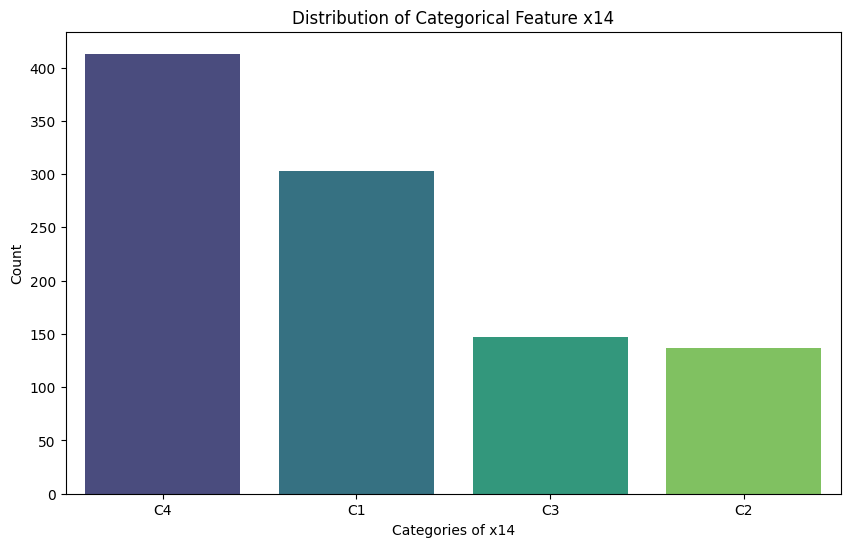


Class distribution in training data:



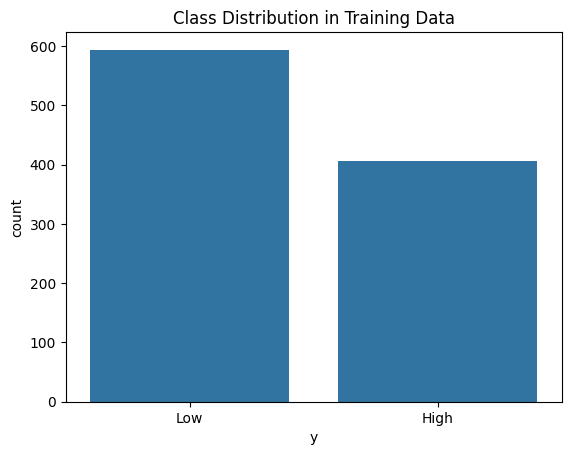

In [12]:
# Load the datasets
train_data = pd.read_csv('Dataset-train-vf.csv')
test_data = pd.read_csv('Dataset-test-vf.csv')

print(train_data.head(), '\n')

# Basic statistics for numerical training data
print("Description of numerical training data:")
print(train_data.describe())
print(train_data['y'].value_counts(), '\n')

# Basic statistics for categorical training data
print("\nUnique values in x14:", train_data['x14'].unique())

# Count the occurrences of each category in x14
x14_counts = train_data['x14'].value_counts()
print("Counts for each category in x14:\n", x14_counts)

# Plot the distribution of the categorical feature x14
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='x14', order=x14_counts.index, palette='viridis')
plt.title('Distribution of Categorical Feature x14')
plt.xlabel('Categories of x14')
plt.ylabel('Count')
plt.show()

# Visualize class distribution for training data
print("\nClass distribution in training data:\n")
sns.countplot(x='y', data=train_data)
plt.title('Class Distribution in Training Data')
plt.show()



## 2- Feature selection/transformation/engineering

## 3- Dealing with missing values

## 4- Dealing with imbalanced data

## 5- Four Classifiers

#### 5.1 Linear Classifier: (LG/SVM)

#### 5.2 (KNN/DT)

#### 5.3 (NN)

#### 5.4 Ensemble Learning (RF/Adaboost)

## 6- Error analysis and possible improvements

## 7- Final results on the test set